In [ ]:
!pip install opencv-python tensorflow mtcnn retina-face

!pip install deepface

import cv2
from deepface import DeepFace
import time


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WhatsApp Video 2025-12-23 at 19.06.02.mp4 to WhatsApp Video 2025-12-23 at 19.06.02 (1).mp4


In [ ]:
!ls


 A4E85F12-688E-452C-9801-862878EA0A7F_1_102_o.jpeg
 emotion_log.csv
 output_emotion.mp4
 sample_data
'WhatsApp Video 2025-12-23 at 19.06.02 (1).mp4'
'WhatsApp Video 2025-12-23 at 19.06.02.mp4'


In [ ]:
# 5 emotions we care about
EMOTIONS = ["angry", "happy", "sad", "surprise", "neutral"]

In [ ]:
# Colors
WHITE = (255, 255, 255)
NEON_PINK = (255, 0, 255)



In [ ]:
# Analyze every N seconds for smooth performance
ANALYZE_EVERY = 0.6  # seconds

cap = cv2.VideoCapture("WhatsApp Video 2025-12-23 at 19.06.02.mp4")  # your video filename


last_analysis_time = 0
emotion_scores = {e: 0 for e in EMOTIONS}
top_emotion = "neutral"
top_conf = 0


In [ ]:
import cv2
from deepface import DeepFace
import time

# ---------------- PERFORMANCE CONFIG ----------------
FRAME_SKIP = 10          # detect face every 10 frames
ANALYZE_EVERY = 1.5      # analyze emotion every 1.5 sec
EMOTION_THRESHOLD = 25   # % threshold to override neutral
# ----------------------------------------------------

frame_count = 0
last_analysis_time = 0

# ---------------- EMOTIONS ----------------
EMOTIONS = ["angry", "happy", "sad", "surprise", "neutral"]

WHITE = (255, 255, 255)
NEON_PINK = (255, 0, 255)
GRAY = (180, 180, 180)

emotion_scores = {e: 0 for e in EMOTIONS}
top_emotion = "neutral"
top_conf = 0

# ---------------- VIDEO INPUT ----------------
cap = cv2.VideoCapture("WhatsApp Video 2025-12-23 at 19.06.02.mp4")

if not cap.isOpened():
    raise Exception("❌ Could not open video file")

# ---------------- VIDEO OUTPUT ----------------
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(
    "output_emotion1.mp4",
    fourcc,
    20.0,
    (int(cap.get(3)), int(cap.get(4)))
)

# ---------------- FACE CACHE ----------------
last_face_img = None
last_face_region = None


# ---------------- FACE DETECTION ----------------
def detect_face(frame):
    faces = DeepFace.extract_faces(
        img_path=frame,
        detector_backend="retinaface",
        enforce_detection=False
    )

    if len(faces) == 0:
        return None, None

    return faces[0]["face"], faces[0]["facial_area"]


# ---------------- EMOTION ANALYSIS ----------------
def analyze_emotion(face_img):
    global emotion_scores, top_emotion, top_conf

    result = DeepFace.analyze(
        face_img,
        actions=["emotion"],
        enforce_detection=True
    )

    emo = result[0]["emotion"]

    # Save scores
    for e in EMOTIONS:
        emotion_scores[e] = float(emo.get(e, 0.0))

    # -------- NEUTRAL FIX LOGIC --------
    non_neutral = {k: v for k, v in emotion_scores.items() if k != "neutral"}
    best_emotion = max(non_neutral, key=non_neutral.get)

    if non_neutral[best_emotion] > EMOTION_THRESHOLD:
        top_emotion = best_emotion
    else:
        top_emotion = "neutral"

    top_conf = int(emotion_scores[top_emotion])


# ---------------- MAIN LOOP ----------------
print("▶ Processing video... please wait")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    h, w, _ = frame.shape

    # ---------- HUD ----------
    cv2.rectangle(frame, (0, 0), (w, 40), (0, 0, 0), -1)
    cv2.putText(frame, "AI FACE EMOTION HUD",
                (10, 28),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, NEON_PINK, 2)

    # ---------- FACE DETECTION (SKIPPED FRAMES) ----------
    if frame_count % FRAME_SKIP == 0:
        face_img, face_region = detect_face(frame)
        if face_img is not None:
            last_face_img = face_img
            last_face_region = face_region
    else:
        face_img, face_region = last_face_img, last_face_region

    # ---------- DRAW + ANALYZE ----------
    if face_img is not None and face_region is not None:
        x, y, fw, fh = (
            face_region["x"],
            face_region["y"],
            face_region["w"],
            face_region["h"]
        )

        cv2.rectangle(frame, (x, y), (x + fw, y + fh), WHITE, 2)

        if time.time() - last_analysis_time > ANALYZE_EVERY:
            try:
                analyze_emotion(face_img)
                last_analysis_time = time.time()
            except:
                pass

        label = f"{top_emotion.upper()} ({top_conf}%)"
        cv2.rectangle(frame, (x, y - 30), (x + fw, y), (0, 0, 0), -1)
        cv2.putText(frame, label,
                    (x + 5, y - 8),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, WHITE, 2)

    # ---------- SIDE PANEL ----------
    panel_x = 20
    panel_y = 60
    line_h = 28
    max_bar_w = 160

    for i, emo in enumerate(EMOTIONS):
        y_off = panel_y + i * line_h
        score = emotion_scores[emo]
        bar_w = int((score / 100.0) * max_bar_w)

        cv2.putText(frame, emo,
                    (panel_x, y_off),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, WHITE, 1)

        cv2.rectangle(frame,
                      (panel_x + 90, y_off - 12),
                      (panel_x + 90 + bar_w, y_off + 4),
                      NEON_PINK if emo == top_emotion else GRAY,
                      -1)

    out.write(frame)

# ---------------- CLEANUP ----------------
cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Done!")
print("🎥 Output saved as output_emotion.mp4")


▶ Processing video... please wait
✅ Done!
🎥 Output saved as output_emotion.mp4


In [ ]:
from IPython.display import Video
Video("output_emotion.mp4", embed=True)


In [ ]:
from google.colab import files
files.download("output_emotion1.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WhatsApp Image 2025-12-23 at 19.48.51.jpeg to WhatsApp Image 2025-12-23 at 19.48.51.jpeg


In [ ]:
!ls


 A4E85F12-688E-452C-9801-862878EA0A7F_1_102_o.jpeg
'Adobe Express - file.jpg'
 emotion_log.csv
 output_emotion1.mp4
 sample_data
'WhatsApp Image 2025-12-23 at 19.45.27 (1).jpeg'
'WhatsApp Image 2025-12-23 at 19.48.51.jpeg'
'WhatsApp Video 2025-12-23 at 19.06.02 (1).mp4'
'WhatsApp Video 2025-12-23 at 19.06.02.mp4'


25-12-23 14:12:28 - 🔗 facial_expression_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5 to /root/.deepface/weights/facial_expression_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 145MB/s]


Detected Emotion: happy
Confidence: 98 %
All Scores: {'angry': np.float32(1.3395246e-06), 'disgust': np.float32(1.0863277e-08), 'fear': np.float32(2.5927495e-06), 'happy': np.float32(98.90648), 'sad': np.float32(0.00021725736), 'surprise': np.float32(0.00051011617), 'neutral': np.float32(1.0927811)}


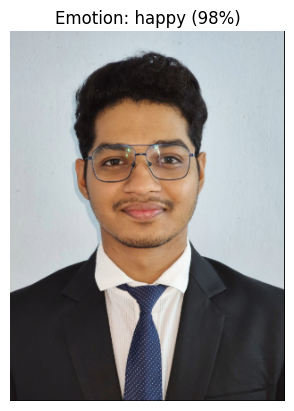

In [ ]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

# ---- LOAD IMAGE ----
img_path = "/content/Adobe Express - file.jpg"   # change name if different
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---- ANALYZE EMOTION ----
result = DeepFace.analyze(
    img_rgb,
    actions=["emotion"],
    detector_backend="retinaface",
    enforce_detection=False
)

emotion_scores = result[0]["emotion"]

# ---- FIND TOP EMOTION (NEUTRAL FIX) ----
non_neutral = {k: v for k, v in emotion_scores.items() if k != "neutral"}
best_emotion = max(non_neutral, key=non_neutral.get)

if non_neutral[best_emotion] > 25:
    top_emotion = best_emotion
else:
    top_emotion = "neutral"

confidence = int(emotion_scores[top_emotion])

print("Detected Emotion:", top_emotion)
print("Confidence:", confidence, "%")
print("All Scores:", emotion_scores)

# ---- SHOW IMAGE ----
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Emotion: {top_emotion} ({confidence}%)")
plt.show()


Detected Emotion: happy
Confidence: 66 %
All Scores: {'angry': np.float32(0.021627676), 'disgust': np.float32(0.0011097552), 'fear': np.float32(1.9221617), 'happy': np.float32(66.388695), 'sad': np.float32(0.42585066), 'surprise': np.float32(0.045419905), 'neutral': np.float32(31.195131)}


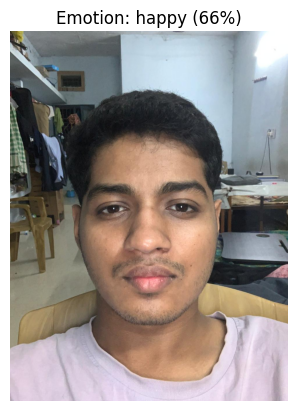

In [ ]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

# ---- LOAD IMAGE ----
img_path = "/content/WhatsApp Image 2025-12-23 at 19.45.27 (1).jpeg"   # change name if different
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---- ANALYZE EMOTION ----
result = DeepFace.analyze(
    img_rgb,
    actions=["emotion"],
    detector_backend="retinaface",
    enforce_detection=False
)

emotion_scores = result[0]["emotion"]

# ---- FIND TOP EMOTION (NEUTRAL FIX) ----
non_neutral = {k: v for k, v in emotion_scores.items() if k != "neutral"}
best_emotion = max(non_neutral, key=non_neutral.get)

if non_neutral[best_emotion] > 25:
    top_emotion = best_emotion
else:
    top_emotion = "neutral"

confidence = int(emotion_scores[top_emotion])

print("Detected Emotion:", top_emotion)
print("Confidence:", confidence, "%")
print("All Scores:", emotion_scores)

# ---- SHOW IMAGE ----
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Emotion: {top_emotion} ({confidence}%)")
plt.show()


Detected Emotion: happy
Confidence: 41 %
All Scores: {'angry': np.float32(0.0003321396), 'disgust': np.float32(5.352958e-12), 'fear': np.float32(0.039662953), 'happy': np.float32(41.7289), 'sad': np.float32(0.23452541), 'surprise': np.float32(0.0025471067), 'neutral': np.float32(57.994034)}


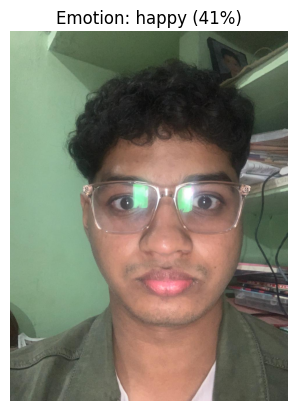

In [ ]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

# ---- LOAD IMAGE ----
img_path = "WhatsApp Image 2025-12-23 at 19.48.51.jpeg"   # change name if different
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---- ANALYZE EMOTION ----
result = DeepFace.analyze(
    img_rgb,
    actions=["emotion"],
    detector_backend="retinaface",
    enforce_detection=False
)

emotion_scores = result[0]["emotion"]

# ---- FIND TOP EMOTION (NEUTRAL FIX) ----
non_neutral = {k: v for k, v in emotion_scores.items() if k != "neutral"}
best_emotion = max(non_neutral, key=non_neutral.get)

if non_neutral[best_emotion] > 25:
    top_emotion = best_emotion
else:
    top_emotion = "neutral"

confidence = int(emotion_scores[top_emotion])

print("Detected Emotion:", top_emotion)
print("Confidence:", confidence, "%")
print("All Scores:", emotion_scores)

# ---- SHOW IMAGE ----
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Emotion: {top_emotion} ({confidence}%)")
plt.show()
